<a href="https://www.kaggle.com/code/manthanvarmas/lgbtq-worldwide-analysis?scriptVersionId=247448416" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/kaggle/input/lgbt-rights-worldwide/lgbtq_rights_by_country.csv')
df.head()

,Territory,Same-sex sexual activity,Recognition of same-sex unions,Same-sex marriage,Adoption by same-sex couples,LGBT people allowed to serve openly in military?,Anti-discrimination laws concerning sexual orientation,Laws concerning gender identity/expression
0,Benin,Yes,No,No,No,Unknown,No,Unknown
1,Burkina Faso,Yes,No,No,No,Unknown,No,Unknown
2,Cape Verde,Yes,No,No,No,Unknown,Yes,Unknown
3,Gambia,No,No,No,No,No,No,No
4,Ghana,No,No,No,No,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Territory                                               239 non-null    object
 1   Same-sex sexual activity                                239 non-null    object
 2   Recognition of same-sex unions                          239 non-null    object
 3   Same-sex marriage                                       239 non-null    object
 4   Adoption by same-sex couples                            239 non-null    object
 5   LGBT people allowed to serve openly in military?        239 non-null    object
 6   Anti-discrimination laws concerning sexual orientation  239 non-null    object
 7   Laws concerning gender identity/expression              239 non-null    object
dtypes: object(8)
memory usage: 15.1+ KB


In [4]:
df.describe()

,Territory,Same-sex sexual activity,Recognition of same-sex unions,Same-sex marriage,Adoption by same-sex couples,LGBT people allowed to serve openly in military?,Anti-discrimination laws concerning sexual orientation,Laws concerning gender identity/expression
count,239,239,239,239,239,239,239,239
unique,227,3,2,2,3,3,3,3
top,Indonesia,Yes,No,No,No,Yes,Yes,Yes
freq,2,185,156,171,159,110,140,113


In [5]:
display(df.isnull().sum())

Territory                                                 0
Same-sex sexual activity                                  0
Recognition of same-sex unions                            0
Same-sex marriage                                         0
Adoption by same-sex couples                              0
LGBT people allowed to serve openly in military?          0
Anti-discrimination laws concerning sexual orientation    0
Laws concerning gender identity/expression                0
dtype: int64

In [6]:
print("\n🔹 Unique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


🔹 Unique Values in Each Column:
Territory: 227 unique values
Same-sex sexual activity: 3 unique values
Recognition of same-sex unions: 2 unique values
Same-sex marriage: 2 unique values
Adoption by same-sex couples: 3 unique values
LGBT people allowed to serve openly in military?: 3 unique values
Anti-discrimination laws concerning sexual orientation: 3 unique values
Laws concerning gender identity/expression: 3 unique values


In [7]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

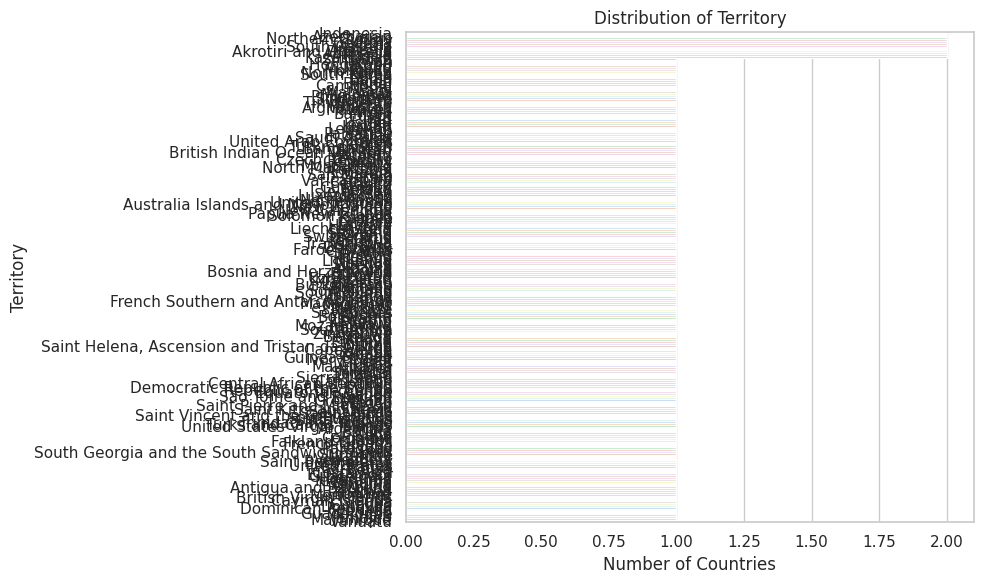

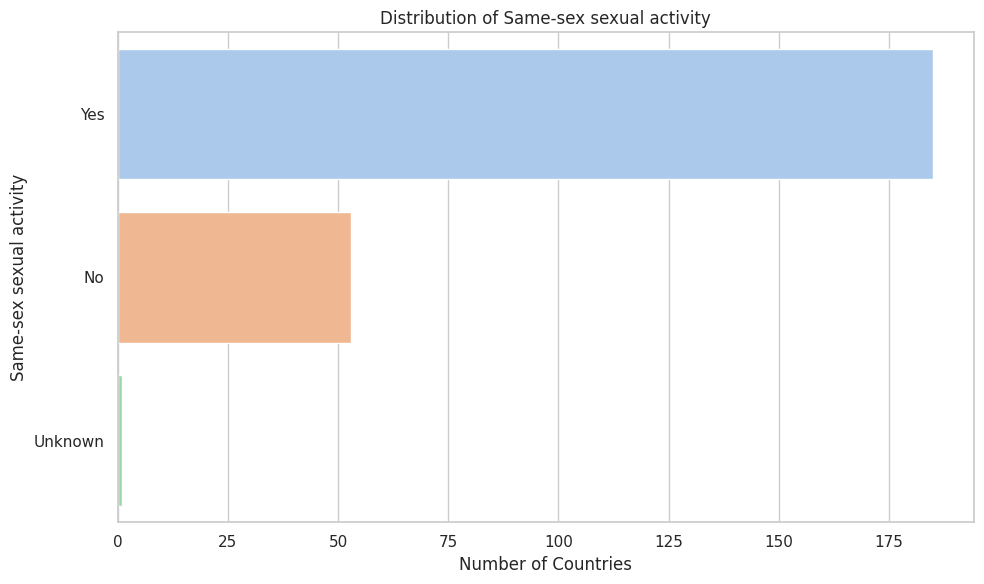

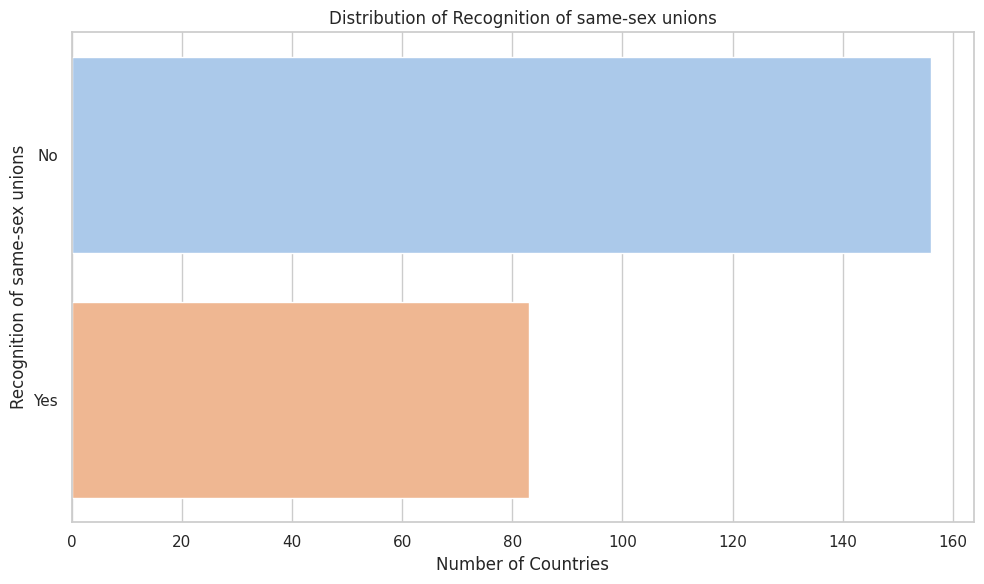

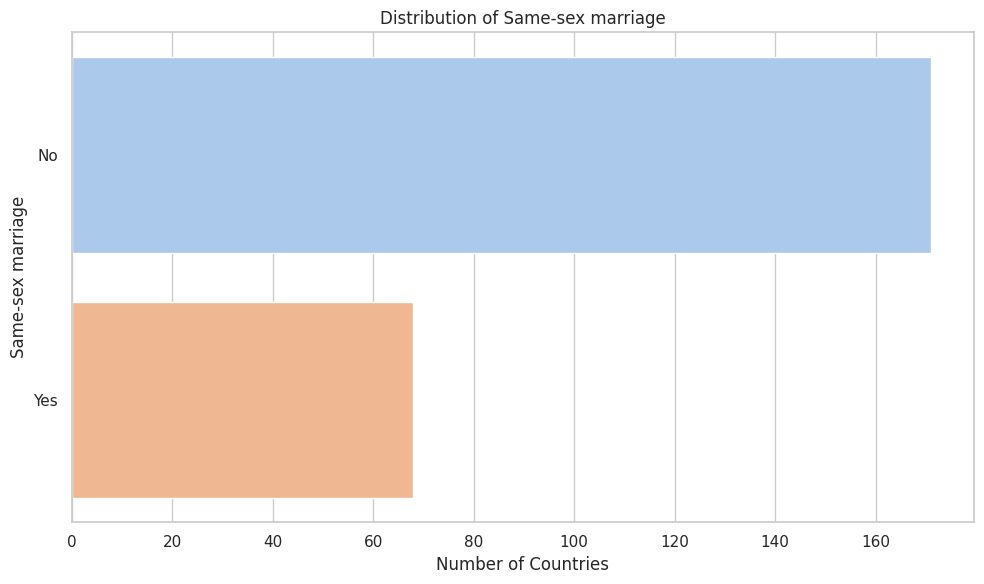

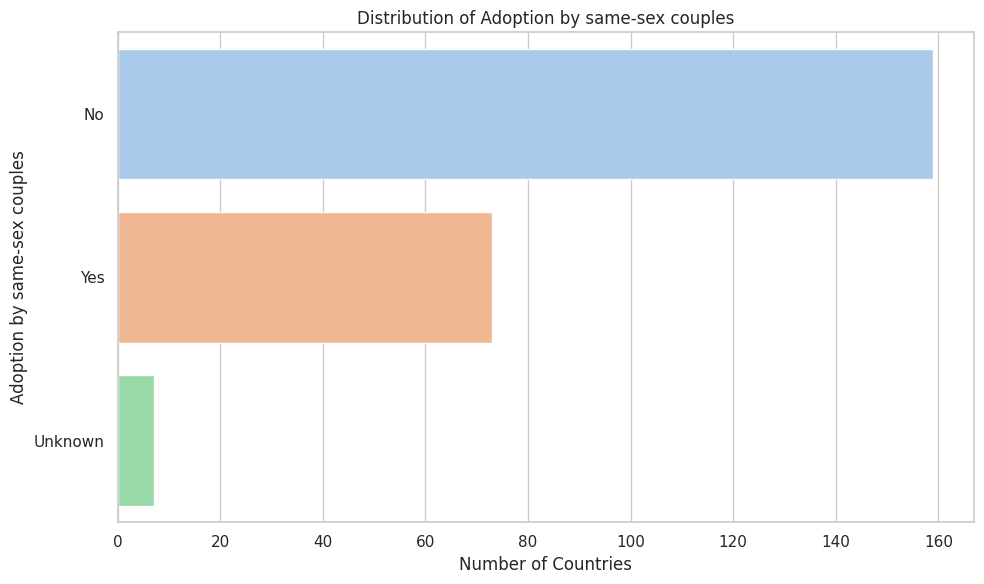

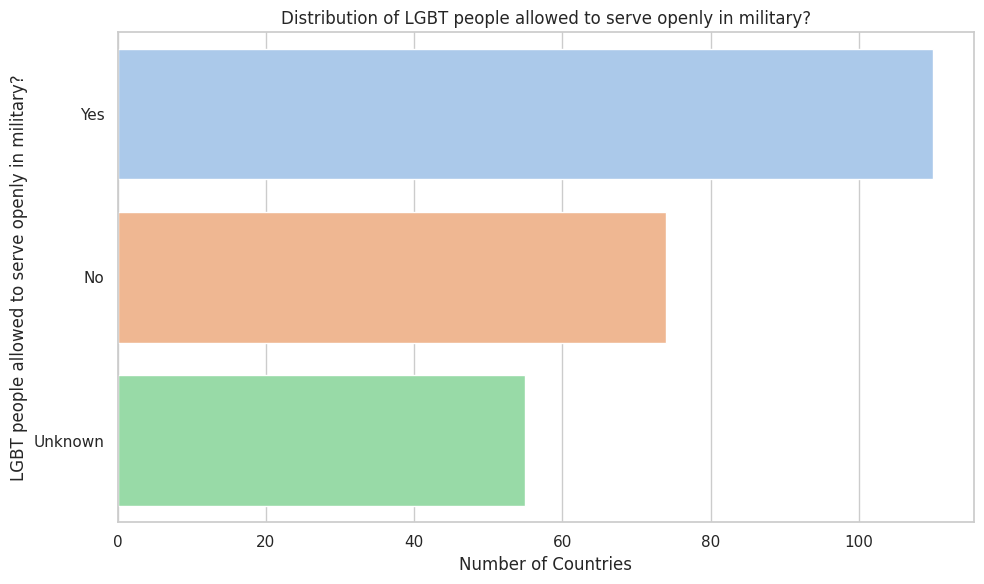

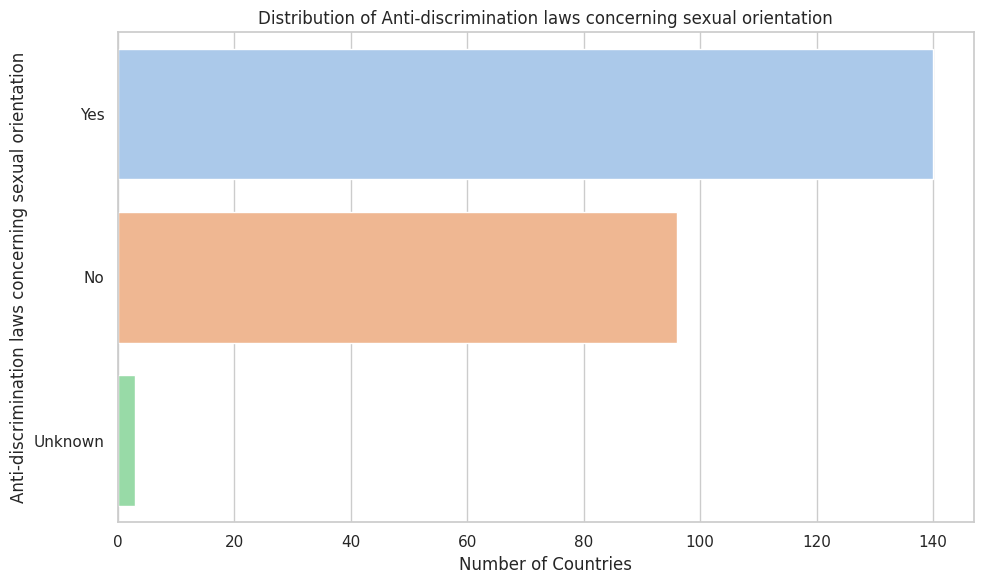

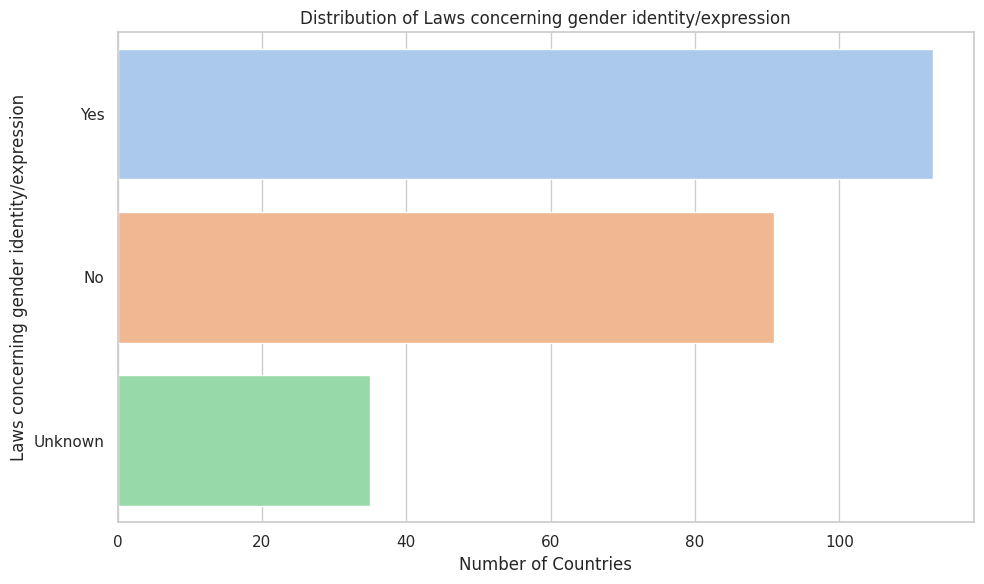

In [8]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Country') if 'Country' in categorical_cols else None

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Number of Countries")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [9]:
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.strip().str.title()
rights_cols = df.columns[1:]
df['total_rights'] = df[rights_cols].apply(lambda row: sum(x == 'Yes' for x in row), axis=1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


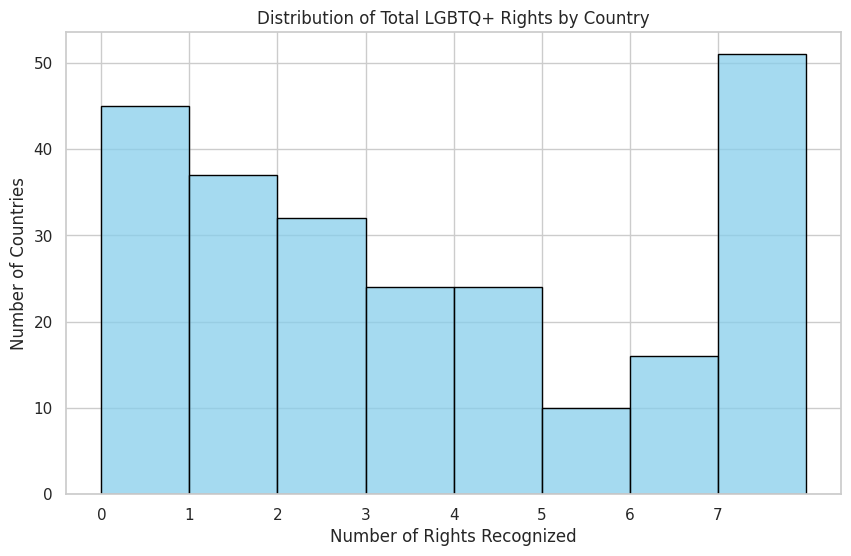

In [10]:
sns.histplot(df['total_rights'], bins=range(0, len(rights_cols)+2), kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Total LGBTQ+ Rights by Country')
plt.xlabel('Number of Rights Recognized')
plt.ylabel('Number of Countries')
plt.xticks(range(len(rights_cols)+1))
plt.grid(True)
plt.show()

In [11]:
print("🔝 Top 10 Countries with Most LGBTQ+ Rights:")
display(df[['Territory', 'total_rights']].sort_values(by='total_rights', ascending=False).head(10))

print("\n🔻 Bottom 10 Countries with Fewest LGBTQ+ Rights:")
display(df[['Territory', 'total_rights']].sort_values(by='total_rights', ascending=True).head(10))

🔝 Top 10 Countries with Most LGBTQ+ Rights:


,Territory,total_rights
89,Saint Martin,7
214,Portugal,7
58,United States,7
198,Sweden,7
210,Malta,7
74,Cuba,7
207,Greece,7
206,Gibraltar,7
95,United States Virgin Islands,7
37,French Southern and Antarctic Lands,7



🔻 Bottom 10 Countries with Fewest LGBTQ+ Rights:


,Territory,total_rights
33,South Sudan,0
115,Turkmenistan,0
27,Eritrea,0
28,Ethiopia,0
141,Afghanistan,0
140,Yemen,0
31,Somalia,0
32,Somaliland,0
116,Uzbekistan,0
34,Tanzania,0


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


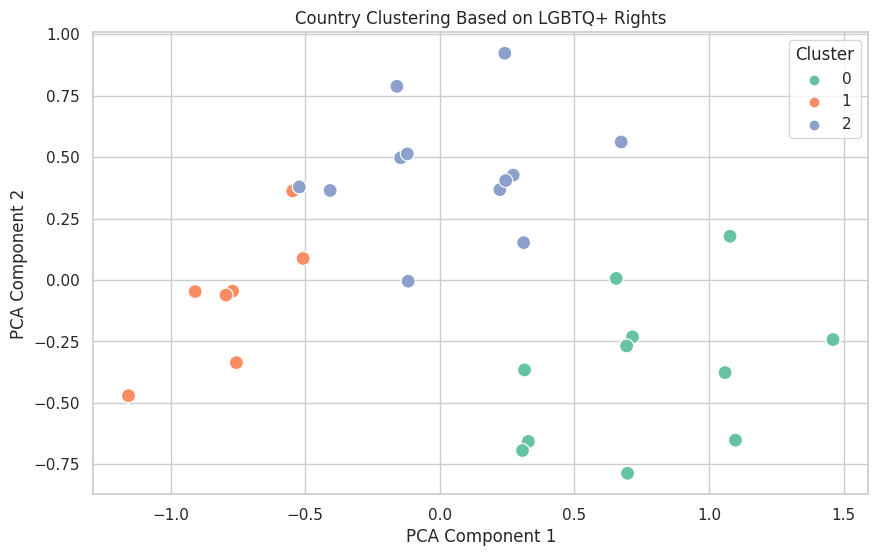

In [12]:
encoded_df = df.copy()
for col in df.columns[1:]:
    encoded_df[col] = encoded_df[col].apply(lambda x: 1 if x == 'Yes' else 0)

X = encoded_df.iloc[:, 1:]  # exclude 'Territory'
kmeans = KMeans(n_clusters=3, random_state=42)
encoded_df['Cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
encoded_df['PCA1'] = X_reduced[:, 0]
encoded_df['PCA2'] = X_reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=encoded_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Country Clustering Based on LGBTQ+ Rights')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [13]:
for i in range(kmeans.n_clusters):
    print(f"\n🌍 Countries in Cluster {i}:")
    display(encoded_df[encoded_df['Cluster'] == i]['Territory'].reset_index(drop=True))


🌍 Countries in Cluster 0:


0     Saint Helena, Ascension and Tristan da Cunha
1              French Southern and Antarctic Lands
2                                          Mayotte
3                                          Réunion
4                                     South Africa
                          ...                     
71                                     Netherlands
72                                  United Kingdom
73            Australia Islands and Norfolk Island
74                                     New Zealand
75                                   New Caledonia
Name: Territory, Length: 76, dtype: object


🌍 Countries in Cluster 1:


0                Benin
1         Burkina Faso
2               Gambia
3                Ghana
4               Guinea
            ...       
90        Transnistria
91              Turkey
92        Vatican City
93    Papua New Guinea
94     Solomon Islands
Name: Territory, Length: 95, dtype: object


🌍 Countries in Cluster 2:


0                Cape Verde
1     São Tomé and Príncipe
2                     Kenya
3                 Mauritius
4                Seychelles
              ...          
63                   Serbia
64                   Monaco
65                     Fiji
66                Indonesia
67                  Vanuatu
Name: Territory, Length: 68, dtype: object

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


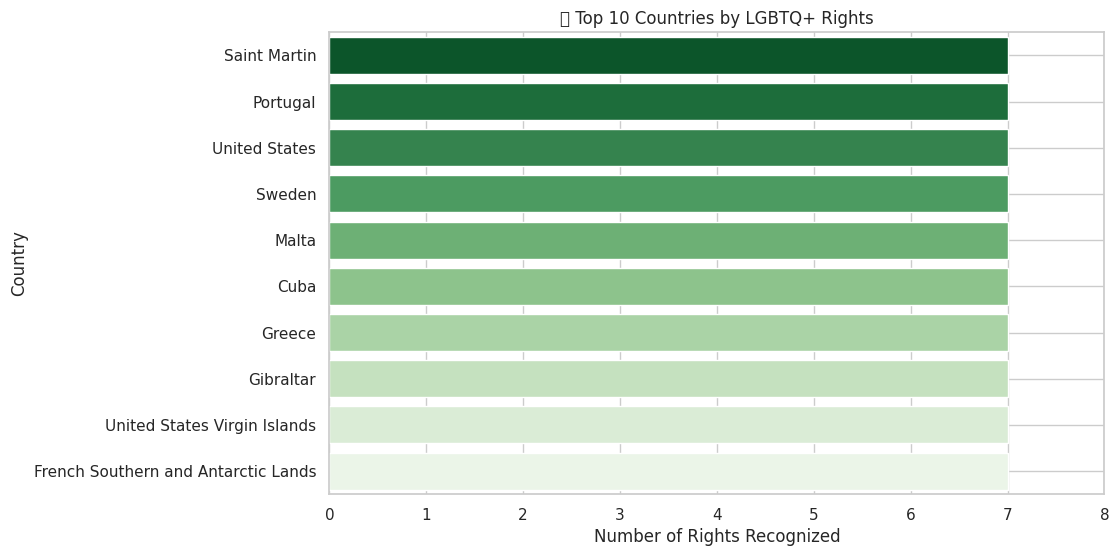

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


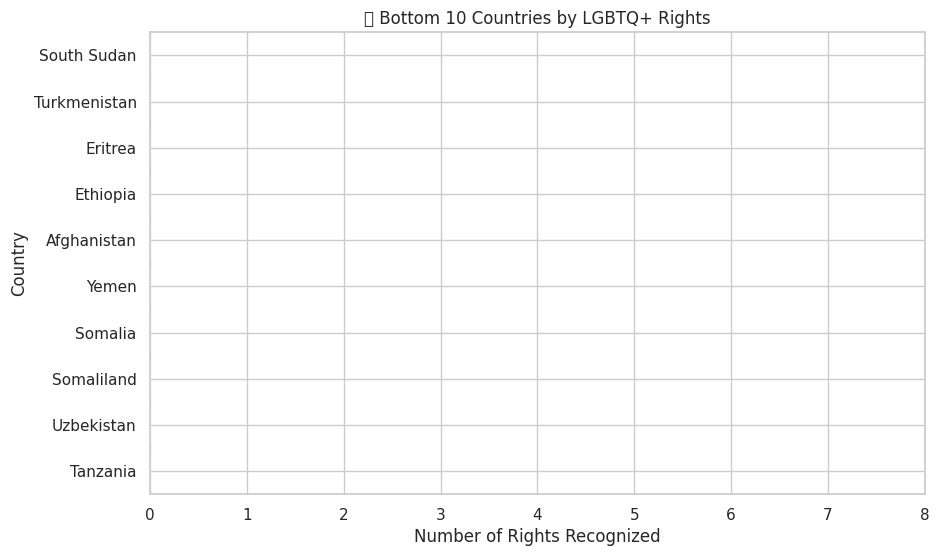

In [14]:
top_countries = df.sort_values(by='total_rights', ascending=False).head(10)
bottom_countries = df.sort_values(by='total_rights', ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='total_rights', y='Territory', palette='Greens_r')
plt.title('🌈 Top 10 Countries by LGBTQ+ Rights')
plt.xlabel('Number of Rights Recognized')
plt.ylabel('Country')
plt.xlim(0, df['total_rights'].max() + 1)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=bottom_countries, x='total_rights', y='Territory', palette='Reds')
plt.title('🚫 Bottom 10 Countries by LGBTQ+ Rights')
plt.xlabel('Number of Rights Recognized')
plt.ylabel('Country')
plt.xlim(0, df['total_rights'].max() + 1)
plt.grid(True)
plt.show()

In [15]:
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.strip().str.title()

value_map = {
    'Yes': 'Yes',
    'No': 'No',
    'Unknown': 'Unknown',
    'Illegal': 'No',
    'Legal': 'Yes',
    'Varies': 'Unknown',
    'Ambiguous': 'Unknown',
    'N/A': 'Unknown',
    'Na': 'Unknown',
    'Nan': 'Unknown'
}

for col in df.columns[1:]:
    df[col] = df[col].replace(value_map)

binary_df = df.copy()
for col in binary_df.columns[1:]:
    binary_df[col] = binary_df[col].apply(lambda x: 1 if x == 'Yes' else 0)

binary_df['total_rights'] = binary_df.iloc[:, 1:].sum(axis=1)

print("✅ Cleaned and Binary-Encoded Dataset Preview:")
display(binary_df.head())

print("\n🧼 Final Column Unique Values Check:")
for col in df.columns[1:]:
    print(f"{col}: {df[col].unique()}")

✅ Cleaned and Binary-Encoded Dataset Preview:


,Territory,Same-sex sexual activity,Recognition of same-sex unions,Same-sex marriage,Adoption by same-sex couples,LGBT people allowed to serve openly in military?,Anti-discrimination laws concerning sexual orientation,Laws concerning gender identity/expression,total_rights
0,Benin,1,0,0,0,0,0,0,1
1,Burkina Faso,1,0,0,0,0,0,0,1
2,Cape Verde,1,0,0,0,0,1,0,2
3,Gambia,0,0,0,0,0,0,0,0
4,Ghana,0,0,0,0,0,0,0,0



🧼 Final Column Unique Values Check:
Same-sex sexual activity: ['Yes' 'No' 'Unknown']
Recognition of same-sex unions: ['No' 'Yes']
Same-sex marriage: ['No' 'Yes']
Adoption by same-sex couples: ['No' 'Yes' 'Unknown']
LGBT people allowed to serve openly in military?: ['Unknown' 'No' 'Yes']
Anti-discrimination laws concerning sexual orientation: ['No' 'Yes' 'Unknown']
Laws concerning gender identity/expression: ['Unknown' 'No' 'Yes']
total_rights: ['1' '2' '0' '6' '7' '4' '3' '5']


In [16]:
df['Same-sex marriage'] = df['Same-sex marriage'].apply(lambda x: 1 if x == 'Yes' else 0)

X = binary_df.drop(columns=['Territory', 'Same-sex marriage'])
y = df['Same-sex marriage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.83      1.00      0.91        10

    accuracy                           0.96        48
   macro avg       0.92      0.97      0.94        48
weighted avg       0.97      0.96      0.96        48

🧩 Confusion Matrix:
[[36  2]
 [ 0 10]]
